In [1]:
import numpy as np
import pandas as pd

#expand max number of display columns
pd.set_option('display.max_column', 100)

from matplotlib import pyplot as plt

#display plots in the notebook
%matplotlib inline

#seaborn for more options of visualisation
import seaborn as sns

from sklearn.model_selection import train_test_split

Import the dataset using the pandas **pd.read_csv()** function, to import CSV file into Pandas DataFrame.

In [2]:
#import mathematics dataset
df = pd.read_csv('Data\student-mat.csv', sep =';')

The first step is to display the dimension of data.

In [3]:
#check data dimensions
df.shape

(395, 33)

The first value is number of rows (observations) and the second value is number of columns (features).

In [4]:
#check data types
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
#display first few rows of data
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [6]:
#display last few rows of data
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


#### Distributions
For a large dataset, it's good to have a quick overview of the distribution of the numerical data.

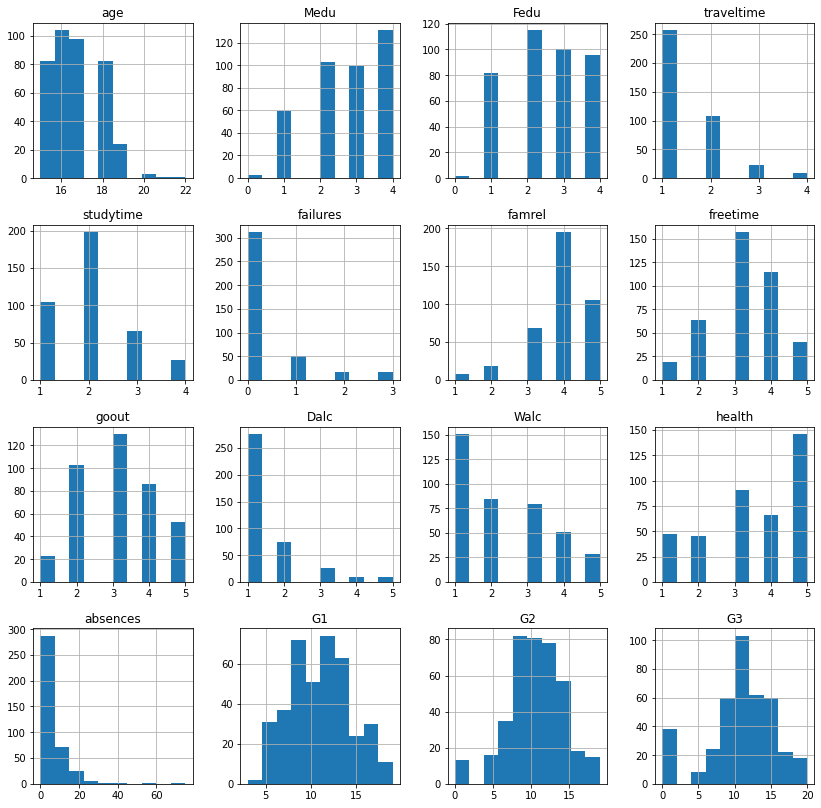

In [7]:
#plot histogram on numerial data

df.hist(figsize = [14,14])

plt.show() #remove 'residue' text

In [8]:
#numerical data summary
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
#categorical data summary
df.describe(include = 'object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


Visualize the categorical data using bar plot.
We use a **for loop** to assist us in plotting the bar plots for each categorical data.

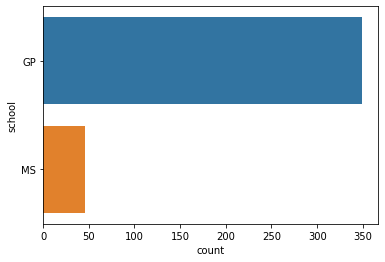

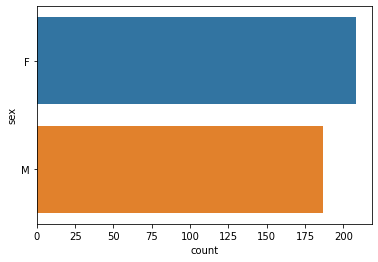

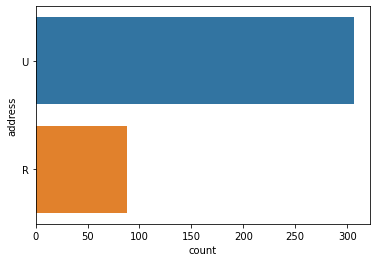

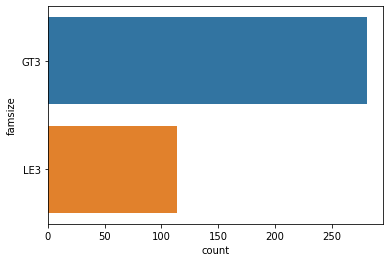

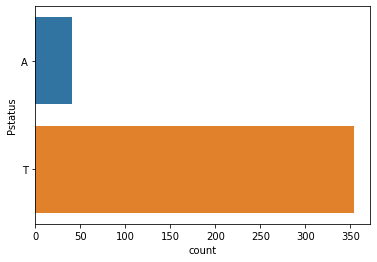

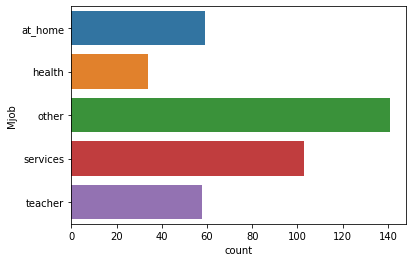

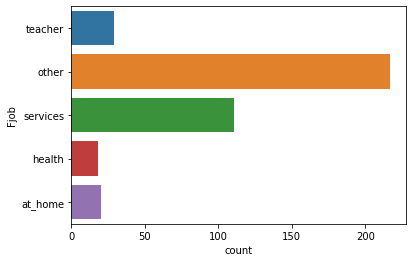

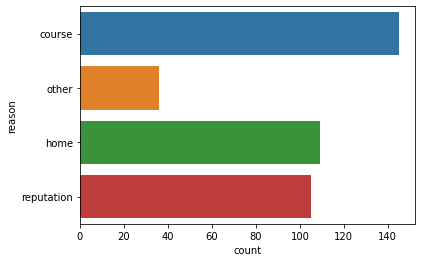

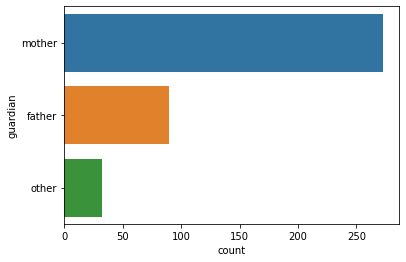

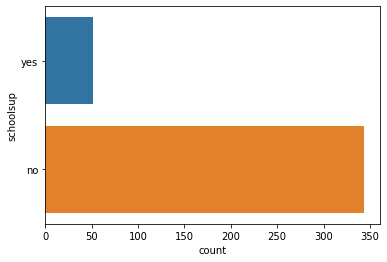

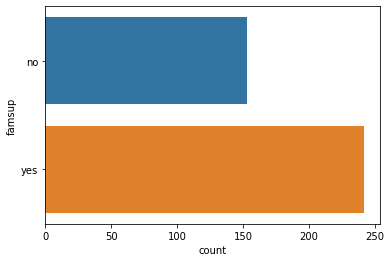

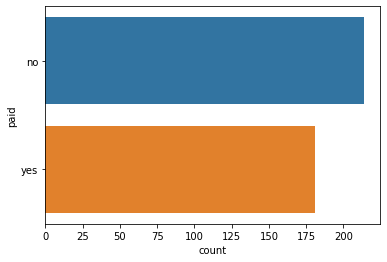

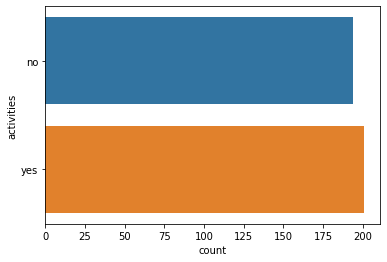

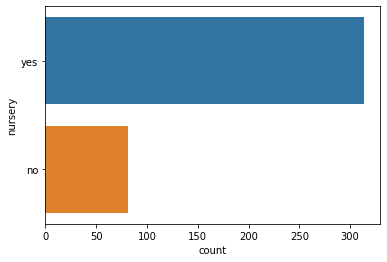

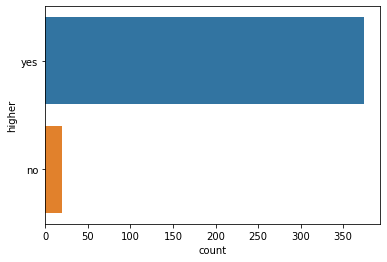

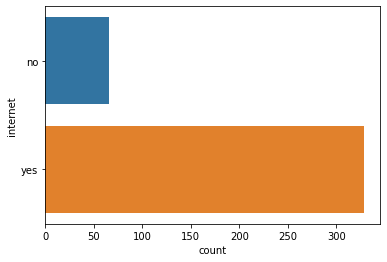

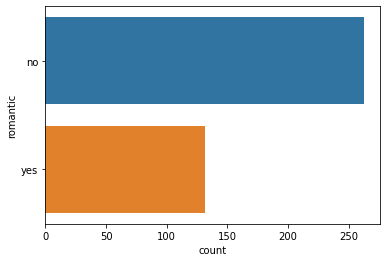

In [10]:
# visualise categorical data using bar plot
for feature in df.dtypes[df.dtypes =='object'].index:
    sns.countplot(y = feature, data = df)
    plt.show()

### Correlations
The correlations between the numerical features.

In [11]:
#correlations between numerical features
df.corr()

C:\Users\david\AppData\Local\Temp/ipykernel_15280/3390951034.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


C:\Users\david\AppData\Local\Temp/ipykernel_15280/3094311727.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


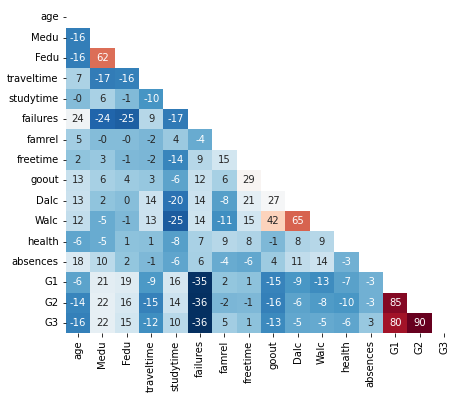

In [12]:
# visualise correlations between numerical features
correlations = df.corr()

plt.figure(figsize = (7,6))

#generate a mask for the upper triangle
#this is for clearer view of the correlations
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1

#to make chart cleaner, multiply corr df with 100 before passing to the heatmap function
#pass the format  to a whole number

sns.heatmap(correlations * 100, cmap='RdBu_r', annot=True, fmt='.0f', mask=mask, cbar = False)
plt.show()

From the heatmap, we can see there were **NO** strong correlations among the numerical features, except the results G1, G2 and G3.

## Data Cleaning
In the next step, i will do some data cleaning, drop unwanted records and fix any structural error.

In [13]:
# remove duplicates data, if any...
df = df.drop_duplicates()
print(df.shape)

(395, 33)


It looks like we don't have any duplicates…

From a quick glance at both the numerical and the categorical data summaries, you can already see that we don't have any missing data. To re-confirm this finding, we run Pandas **isnull()** and **sum()** methods.

In [14]:
# check for missing data
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Overall, there is not much data cleaning required as the data was collected in complete form. There is no outlier or missing data as well.

## Feature Engineering
From the **famsize** (family size) column, we can see that **LE3** is less or equal to 3 and **GT3** is greater than 3. This implies that the data is in ordinal form; so, we will do some feature engineering to change the LE3 to **0** and GT3 to **1**.

In [15]:
#data in ordinal form, replace GT3 with 1 and LE3 with 0
df.famsize.replace(['GT3','LE3'],[1,0], inplace = True)

#### Dummy Variables
I need to create **dummy variables** for categorical features in order to allow us to run machine learning algorithm on the dataset.

Dummy variables are binary (0 or 1) features that each represent a single class from a categorical feature.

In [16]:
#create dummy variables for categorical features to allow us run ML algorithm on our dataset
df = pd.get_dummies(df)

## Data Modelling

In this algorithm selection, i selected linear regression and K-nearest neigbors algorithm.
Linear regression algorithm suffers from two main problems: it's prone to overfitting if we have too many input features, and it cannot easily express non-linear relationship.

To assist in finding the balance for model complexity without overfitting, i also deployed 2x Tree Ensembles algorithms.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Model Training
Since we have first period (G1) and second period (G2) and final grade (G3) results, we will perform the model training with G1 and G2.

First, we split our data into input variable (X) and output variable (y)

In [19]:
#split data into training and testing sets
y = df.G3

#drop target variable G3, keep G1 & G2 results as input variables
X= df.drop ('G3', axis = 1)

In [20]:
#perform train and test data splits using y and X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# confirm we have the right number of train and test data set
print( len(X_train), len(X_test), len(y_train), len(y_test) )

316 79 316 79


In [21]:
#  Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict using linear regression model
y_pred_lr = lr.predict(X_test)

# Calculate metrics for linear regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [24]:
# Train the k-nearest neighbors model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [25]:
# Predict using K-Nearest Neighbors model
y_pred_knn = knn.predict(X_test)

# Calculate metrics for K-Nearest Neighbors
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [26]:
# Print the results
print('Linear Regression:')
print('Mean Squared Error (MSE):', mse_lr)
print('R-squared (R2):', r2_lr)

print('\nK-Nearest Neighbors:')
print('Mean Squared Error (MSE):', mse_knn)
print('R-squared (R2):', r2_knn)

Linear Regression:
Mean Squared Error (MSE): 5.656506043964926
R-squared (R2): 0.7241407947020825

K-Nearest Neighbors:
Mean Squared Error (MSE): 4.476962025316457
R-squared (R2): 0.7816653642984402


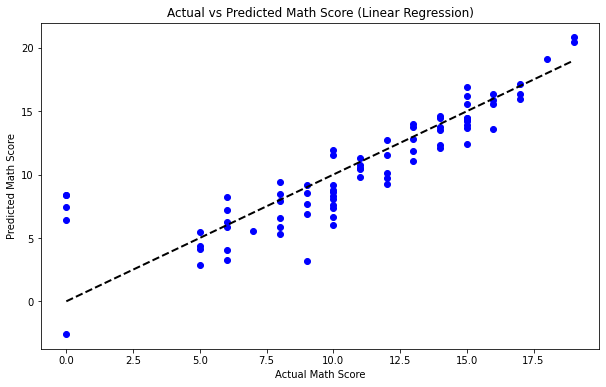

In [27]:
# Plot the actual results vs predicted results for linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, c='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Score (Linear Regression)')
plt.show()

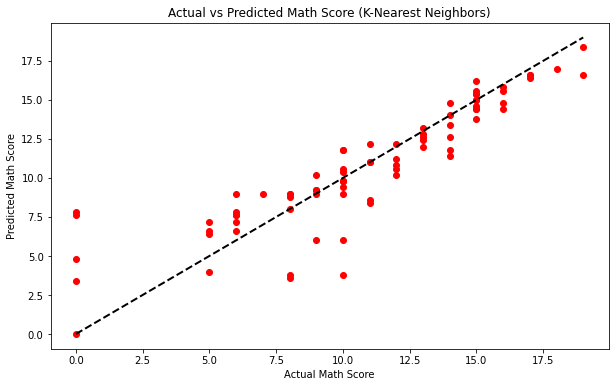

In [28]:
# Plot the actual results vs predicted results for k-nearest neighbors
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, c='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Score (K-Nearest Neighbors)')
plt.show()

The diagonal line in the plot represents perfect predictions, and the scatter points should be close to this line for accurate predictions

#### Tune Hyperparameter can further improve model performance

Here, I will show you how you can further improve the model performance with hyperparameter tuning. 

I have chosen a range of hyperparameters for tuning via Cross Validation (CV). CV will find the best combination of given hyperparameters.

**What is tunning hyperparameters?**<br />
There are two types of parameters we need to worry about when using machine learning algorithms:
1. Model parameters that can be learned directly from the training data
2. Hyperparameters express 'higher-level' structural information about modeling algorithms

Because hyperparameters cannot be learned directly from the data, we must find a way to tune them systematically. There are different ways to do so, but the most common one is **cross-validation**.

However, first you must decide on which hyperparameters to tune, together with which values to try. You can list model tunable hyperparameters using **.get_params()** method.

For each algorithm, typically only a few hyperparameters really influence model performance. Academics and researchers have already spent years studying these algorithms. Data scientists have already applied them on thousands of different problems.

I have chosen the best practices that get results for random forest model.


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [31]:
# Define the parameter grid for hyperparameter tuning
param_grid_lr = {'fit_intercept': [True, False]}  # Parameters for linear regression
param_grid_knn = {'n_neighbors': [3, 5, 7]}  # Parameters for k-nearest neighbors

In [32]:
# Perform cross-validation with hyperparameter tuning for Linear Regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define the cross-validation strategy
lr = LinearRegression()
grid_search_lr = GridSearchCV(lr, param_grid_lr, scoring='neg_mean_squared_error', cv=kf)
grid_search_lr.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [33]:
# Perform cross-validation with hyperparameter tuning for K-Nearest Neighbors
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, param_grid_knn, scoring='neg_mean_squared_error', cv=kf)
grid_search_knn.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7]},
             scoring='neg_mean_squared_error')

In [34]:
# Print the best hyperparameters for Linear Regression
best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters for Linear Regression:", best_params_lr)

# Print the best hyperparameters for K-Nearest Neighbors
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for K-Nearest Neighbors:", best_params_knn)

Best Hyperparameters for Linear Regression: {'fit_intercept': False}
Best Hyperparameters for K-Nearest Neighbors: {'n_neighbors': 3}
